In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

In [6]:
dataset = pd.read_csv("movie_data/train.txt", sep = 'delimiter', header = None, engine = 'python')

In [7]:
dataset.columns = ["review"]

In [8]:
labels = []
for i in range(25000):
    if i < 12500:
        labels.append("pos")
    else:
        labels.append("neg")

In [9]:
dataset = dataset.assign(label=labels)

In [10]:
dataset = shuffle(dataset)

In [11]:
dataset.tail()

,review,label
8083,"When this film was made, the hippie thing had ...",pos
12522,I rented this on DVD and I kind of feel bad si...,neg
22777,This is really a new low in entertainment. Eve...,neg
3132,"""Gespenster"" Question of to be cool in the Ger...",pos
17934,"Recap: According to legend, the Valkyrie Brunh...",neg


In [12]:
dataset['label'].value_counts()

pos    12500
neg    12500
Name: label, dtype: int64

In [13]:
le = LabelEncoder()

In [14]:
y = dataset['label'].values

In [15]:
y = le.fit_transform(y)

In [16]:
y[:100]

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [17]:
sw = set(stopwords.words('english'))
ps = PorterStemmer()

In [18]:
def clean_text(sample):
    sample = sample.lower()
    sample = sample.replace("<br /><br />", "")
    sample = re.sub("[^a-zA-Z]+", " ", sample)
    sample = sample.split()
    sample = [ps.stem(s) for s in sample if s not in sw]
    sample = " ".join(sample)
    return sample

In [19]:
dataset['cleaned_review'] = dataset['review'].apply(clean_text)

In [20]:
dataset

,review,label,cleaned_review
103,A beautiful shopgirl in London is swept off he...,pos,beauti shopgirl london swept feet millionair t...
23119,Entertainment Tonight has been going down hill...,neg,entertain tonight go hill last year last night...
10144,"What fun! Bucketfuls of good humor, terrific c...",pos,fun bucket good humor terrif cast chemistri sk...
233,"""Stargate SG-1"" follows the intergalactic expl...",pos,stargat sg follow intergalact explor team name...
17599,I remember when THE GOLDEN CHILD was released ...,neg,rememb golden child releas univers pan critic ...
...,...,...,...
8083,"When this film was made, the hippie thing had ...",pos,film made hippi thing gone mainstream idea cou...
12522,I rented this on DVD and I kind of feel bad si...,neg,rent dvd kind feel bad sinc dawson lugaci earn...
22777,This is really a new low in entertainment. Eve...,neg,realli new low entertain even though lot wors ...
3132,"""Gespenster"" Question of to be cool in the Ger...",pos,gespenst question cool german cinemather mani ...


In [21]:
corpus = dataset['cleaned_review'].values

In [22]:
cv = CountVectorizer(max_df = 0.5, max_features = 50000)

In [23]:
X = cv.fit_transform(corpus)

In [24]:
print(X[0])

  (0, 3696)	1
  (0, 39343)	1
  (0, 25698)	1
  (0, 42733)	1
  (0, 14825)	1
  (0, 28344)	1
  (0, 43313)	1
  (0, 33243)	1
  (0, 31756)	1
  (0, 40621)	1
  (0, 15169)	1
  (0, 27040)	1
  (0, 25516)	1
  (0, 47407)	1
  (0, 5685)	1
  (0, 7247)	1
  (0, 1166)	1
  (0, 3464)	1
  (0, 46671)	1
  (0, 5115)	1
  (0, 36651)	1
  (0, 41347)	1
  (0, 21498)	1
  (0, 38765)	1
  (0, 19744)	1
  :	:
  (0, 43895)	1
  (0, 10773)	1
  (0, 35311)	1
  (0, 27135)	1
  (0, 14821)	1
  (0, 18769)	1
  (0, 13455)	1
  (0, 48223)	1
  (0, 31140)	1
  (0, 19203)	1
  (0, 25828)	1
  (0, 40392)	1
  (0, 5931)	1
  (0, 36811)	1
  (0, 12270)	1
  (0, 4479)	1
  (0, 44867)	1
  (0, 21739)	1
  (0, 10366)	1
  (0, 13181)	1
  (0, 41336)	1
  (0, 32577)	1
  (0, 44186)	1
  (0, 31569)	1
  (0, 7821)	1


In [25]:
tfidf = TfidfTransformer()

In [26]:
X = tfidf.fit_transform(X)

In [27]:
print(X[0])

  (0, 48223)	0.038027042241216155
  (0, 47916)	0.12082172846358033
  (0, 47568)	0.15335123672051248
  (0, 47407)	0.13484793699277614
  (0, 46671)	0.0774599197096899
  (0, 44867)	0.14630477596474223
  (0, 44186)	0.032708863203220806
  (0, 44058)	0.10411364206097146
  (0, 43895)	0.04093478876641233
  (0, 43313)	0.10918147131875612
  (0, 43285)	0.20436136788319845
  (0, 42733)	0.12029506056629785
  (0, 42167)	0.1157554720109517
  (0, 41974)	0.07401065720692908
  (0, 41665)	0.09467111866598525
  (0, 41429)	0.05222117759424898
  (0, 41347)	0.17427473160834936
  (0, 41336)	0.15169486869232346
  (0, 41278)	0.1133352768508512
  (0, 40621)	0.07211104366208108
  (0, 40392)	0.09812075906052549
  (0, 40241)	0.10973763751941482
  (0, 39343)	0.16927518813806544
  (0, 38765)	0.052205700041889035
  (0, 36811)	0.07941884333599832
  :	:
  (0, 14677)	0.08465032728223804
  (0, 13455)	0.04015453969339398
  (0, 13221)	0.10877572423752613
  (0, 13181)	0.11368637385383977
  (0, 12375)	0.09176362931486587
  (0

In [28]:
X.shape

(25000, 50000)

In [29]:
y.shape

(25000,)

## Neural Network

In [60]:
from keras import models
from keras.layers import Dense

In [61]:
model = models.Sequential()
model.add( Dense(16, activation = "relu", input_shape = (X.shape[1],) ) )
model.add( Dense(16, activation = "relu") )
model.add( Dense(1, activation = "sigmoid") )

In [62]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                800016    
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 800,305
Trainable params: 800,305
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.compile(optimizer = 'rmsprop', loss = "binary_crossentropy", metrics = ['accuracy'])

In [64]:
X_val = X[:2500]
X_train = X[2500:]

y_val= y[:2500]
y_train = y[2500:]

In [65]:
X_train.shape, y_train.shape

((22500, 50000), (22500,))

In [66]:
hist = model.fit(X_train, y_train, batch_size = 128, epochs = 4, validation_data = (X_val, y_val))

Train on 22500 samples, validate on 2500 samples
Epoch 1/4
22500/22500 [==============================] - 10s 458us/step - loss: 0.5182 - accuracy: 0.8413 - val_loss: 0.3361 - val_accuracy: 0.8892
Epoch 2/4
22500/22500 [==============================] - 10s 460us/step - loss: 0.2420 - accuracy: 0.9162 - val_loss: 0.2474 - val_accuracy: 0.9004
Epoch 3/4
22500/22500 [==============================] - 11s 507us/step - loss: 0.1659 - accuracy: 0.9398 - val_loss: 0.2537 - val_accuracy: 0.9020
Epoch 4/4
22500/22500 [==============================] - 11s 496us/step - loss: 0.1307 - accuracy: 0.9545 - val_loss: 0.2602 - val_accuracy: 0.9024


In [67]:
result = hist.history

In [68]:
result

{'val_loss': [0.33609167108535765,
  0.24737935192584992,
  0.2536694974899292,
  0.2602121132850647],
 'val_accuracy': [0.88919997215271,
  0.9003999829292297,
  0.9020000100135803,
  0.902400016784668],
 'loss': [0.5181940309842428,
  0.24203760081397163,
  0.1658658574157291,
  0.13074217501481375],
 'accuracy': [0.8413333, 0.91617775, 0.9397778, 0.95453334]}

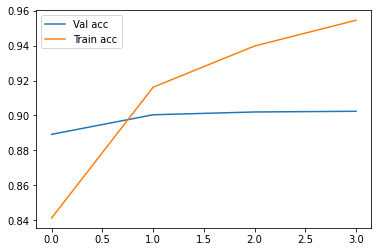

In [69]:
plt.plot(result['val_accuracy'], label = "Val acc")
plt.plot(result['accuracy'], label = "Train acc")
plt.legend()
plt.show()

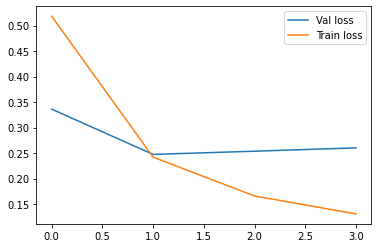

In [70]:
plt.plot(result['val_loss'], label = "Val loss")
plt.plot(result['loss'], label = "Train loss")
plt.legend()
plt.show()

## Test

In [71]:
test = pd.read_csv("movie_data/test.txt", sep = 'delimiter', header = None, engine = 'python')

In [73]:
test.columns = ["review"]

In [74]:
test.head()

,review
0,I went and saw this movie last night after bei...
1,Actor turned director Bill Paxton follows up h...
2,As a recreational golfer with some knowledge o...
3,"I saw this film in a sneak preview, and it is ..."
4,Bill Paxton has taken the true story of the 19...


In [76]:
test['cleaned_review'] = test['review'].apply(clean_text)

In [78]:
X_test = test['cleaned_review']

In [79]:
X_test = cv.transform(X_test)

In [80]:
X_test.shape

(25000, 50000)

In [81]:
X_test = tfidf.transform(X_test)

In [83]:
y_pred = model.predict(X_test)

In [84]:
y_pred [y_pred >= 0.5] = 1

In [85]:
y_pred = y_pred.astype('int')

In [86]:
y_pred[:100]

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
    

In [87]:
dict = {0: 'neg', 1: 'pos'}

In [88]:
y_pred = [dict[p[0]] for p in y_pred]

In [89]:
ids = np.arange(25000)

In [90]:
final_matrix = np.stack((ids, y_pred), axis = 1)

In [91]:
df = pd.DataFrame(final_matrix, columns = ['Id', 'label'])

In [92]:
df.to_csv('y_pred.csv', index = False)